### Лабораторная работа 2: основные понятия

В сегодняшней лабораторной будем работать с данными о проданных на аукционе автомобилях (`Carvana Car Prediction`). Целевым признаком здесь является наличие скрытых продавцом существенных недостатков. 

Carvana &mdash; компания-перекупщик автомобилей, соответственно, ее задача &mdash; не допустить скупку автомобилей со скрытыми недостатками, так как их впоследствии тяжелее продавать.

## 1

Загрузите данные о проданных на аукционе автомобилях. Посмотрите на "сырые" данные. 

Просмотрите файл `DataDictionary-ru.txt` и поймите, что означают столбцы матрицы. Выведите статистику по столбцам.


In [208]:
import pandas as pd

In [209]:
# место для кода
df = pd.read_csv('data.csv', delimiter=',')
df.describe()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72983.000000,69814.000000,72983.000000,72965.000000,72965.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,36511.428497,0.122988,2005.343052,4.176644,1.494299,71499.995917,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,26345.842155,58043.059945,6730.934326,0.025280,1276.580985
std,21077.241302,0.328425,1.731252,1.712210,0.521290,14578.913128,2461.992768,2722.491986,3156.285284,3385.789541,2434.567723,2686.248852,3090.702941,3310.254351,25717.351219,26151.640415,1767.846435,0.156975,598.846788
min,1.000000,0.000000,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000
25%,18257.500000,0.000000,2004.000000,3.000000,1.000000,61837.000000,4273.000000,5406.000000,6280.000000,7493.000000,4275.000000,5414.000000,6536.000000,7784.000000,17212.000000,32124.000000,5435.000000,0.000000,837.000000
50%,36514.000000,0.000000,2005.000000,4.000000,1.000000,73361.000000,6097.000000,7303.000000,8444.000000,9789.000000,6062.000000,7313.000000,8729.000000,10103.000000,19662.000000,73108.000000,6700.000000,0.000000,1155.000000
75%,54764.500000,0.000000,2007.000000,5.000000,2.000000,82436.000000,7765.000000,9021.000000,10651.000000,12088.000000,7736.000000,9013.000000,10911.000000,12309.000000,22808.000000,80022.000000,7900.000000,0.000000,1623.000000
max,73014.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,45469.000000,1.000000,7498.000000


In [210]:
df.tail()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
72978,73010,1,12/2/2009,ADESA,2001,8,MERCURY,SABLE,GS,4D SEDAN GS,BLACK,AUTO,1.0,Alloy,45234,AMERICAN,MEDIUM,FORD,1996.0,2993.0,2656.0,3732.0,2190.0,3055.0,4836.0,5937.0,NaN,NaN,18111,30212,GA,4200.0,0,993
72979,73011,0,12/2/2009,ADESA,2007,2,CHEVROLET,MALIBU 4C,LS,4D SEDAN LS,SILVER,AUTO,NaN,NaN,71759,AMERICAN,MEDIUM,GM,6418.0,7325.0,7431.0,8411.0,6785.0,8132.0,10151.0,11652.0,NaN,NaN,18881,30212,GA,6200.0,0,1038
72980,73012,0,12/2/2009,ADESA,2005,4,JEEP,GRAND CHEROKEE 2WD V,Lar,4D WAGON LAREDO,SILVER,AUTO,1.0,Alloy,88500,AMERICAN,MEDIUM SUV,CHRYSLER,8545.0,9959.0,9729.0,11256.0,8375.0,9802.0,11831.0,14402.0,NaN,NaN,18111,30212,GA,8200.0,0,1893
72981,73013,0,12/2/2009,ADESA,2006,3,CHEVROLET,IMPALA,LS,4D SEDAN LS,WHITE,AUTO,1.0,Alloy,79554,AMERICAN,LARGE,GM,6420.0,7604.0,7434.0,8712.0,6590.0,7684.0,10099.0,11228.0,NaN,NaN,18881,30212,GA,7000.0,0,1974
72982,73014,0,12/2/2009,ADESA,2006,3,MAZDA,MAZDA6,s,4D SEDAN S,SILVER,AUTO,1.0,Alloy,66855,OTHER ASIAN,MEDIUM,OTHER,7535.0,8771.0,8638.0,9973.0,7730.0,9102.0,11954.0,13246.0,NaN,NaN,18111,30212,GA,8000.0,0,1313


## 2

Постройте график рассеяния с пробегом в качестве оси абсцисс и ценой `MMRCurrentRetailAveragePrice` в качестве оси ординат. Автомобили без недостатков отметьте зеленым цветом, со скрытыми недостатками — красным.

In [211]:
%matplotlib inline
import matplotlib.pyplot as plt

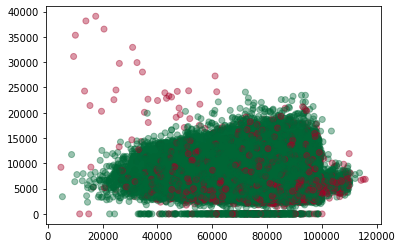

In [212]:
# место для кода
plt.scatter(df['VehOdo'], df['MMRCurrentRetailAveragePrice'], c=df['IsBadBuy']==0, alpha=0.4, cmap='RdYlGn')

# Регрессия

## 3a

Импортируйте из библиотеки `sklearn` все модели машинного обучения:

`from sklearn import *`

Трактуя задачу о предсказании наличия недостатков как задачу регрессии, натренируйте линейную модель [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) на каком-нибудь подмножестве признаков (например, тех же `VehOdo` и `MMRCurrentRetailAveragePrice`). 

С какой проблемой вы столкнулись? Какие способы ее решения вы можете предложить?

*Функции, которые могут пригодиться при решении: `.fit(), .loc[], pd.notnull()`*

*Создание модели:* `model1 = linear_model.LinearRegression()`

*Тренировка:*
`model1.fit(x, y)`



In [213]:
# место для кода
from sklearn import *
tmp = df[['IsBadBuy', 'VehOdo', 'WarrantyCost', 'MMRCurrentRetailAveragePrice', 'MMRAcquisitionAuctionAveragePrice', 'VehBCost', 'VehYear']].dropna()
y=tmp['IsBadBuy']
x=tmp[['VehOdo', 'MMRCurrentRetailAveragePrice', 'MMRAcquisitionAuctionAveragePrice', 'VehBCost']]
model = linear_model.LinearRegression()


In [214]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 3b

Выполните предсказание для всех объектов обучающей выборки и присвойте результат переменной prediction

*Функции, которые могут пригодиться при решении: `model.predict()`*

In [215]:
prediction = model.predict(x)

In [216]:
prediction

array([0.12588233, 0.14351062, 0.16296836, ..., 0.11721731, 0.12878686,
       0.08549815])

## 3c

Преобразуйте получившийся вектор предсказаний `prediction` к значениям `{0,1}`. Это можно сделать, например, используя list comprehensions: https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions 

`predictionClass = [1 if prediction[i] > 0.5 else 0 for i in range(prediction.shape[0])]`

In [217]:
# место для кода
predictionClass = [1 if prediction[i] > 0.18 else 0 for i in range(prediction.shape[0])]

## 3d

Постройте отчет по качеству классификации и матрицу ошибок. Как изменятся отчет и матрица ошибок, если изменить порог в задании 3c (по умолчанию его значение равно 0.5)?

*Функции, которые могут пригодиться при решении: `print(metrics.classification_report(...))`, `print(metrics.confusion_matrix(...))`*

Функция classification_report для каждого класса объектов считает точность (precision) в этом классе и полноту (recall). Полнота - это процент объектов данного класса, которые ваш метод предсказания тоже отнес к этому классу, среди всех объектов данного класса. Точность (precision) - то же самое, только среди всех объектов, предсказанных для этого класса.

Функция confusion_matrix возвращает матрицу с количествами объектов. Номера столбцов матрицы - это номера предсказанных классов, строки - это номера правильных классов. Например, элемент M[0,1] - это количество машин, где на самом деле IsBadBuy = 0, а вы предсказали 1.

In [218]:
# место для кода
print(metrics.classification_report(y, predictionClass))
print(metrics.confusion_matrix(y, predictionClass))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90     63724
           1       0.24      0.22      0.23      8944

    accuracy                           0.82     72668
   macro avg       0.57      0.56      0.56     72668
weighted avg       0.81      0.82      0.81     72668

[[57469  6255]
 [ 6982  1962]]


Порог 0.5 был большой поэтому все машины были хорошими, экспериментальным образом был выбра порог 0.2, который наилчим образом этой предсказывает классы этой ужасной линейной модели регресии

# Классификация

## 4a
Трактуя задачу как задачу классификации, постройте модель классификации «решающее дерево» глубины 20  (все аналогично линейной регрессии).


*Функции, которые могут пригодиться при решении: `tree.DecisionTreeClassifier(max_depth=20) `*

In [219]:
# место для кода
model2=tree.DecisionTreeClassifier(max_depth=20)
model2.fit(x,y)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## 4b

Решающее дерево предсказывает вероятности. С помощью построенной модели рассчитайте вероятности наличия скрываемых недостатков.

*Функции, которые могут пригодиться при решении: `model.predict_proba() `*

In [220]:
# место для кода
prediction2 = model2.predict_proba(x)

In [221]:
print(prediction2)

[[0.92993631 0.07006369]
 [0.83655536 0.16344464]
 [1.         0.        ]
 ...
 [0.90086207 0.09913793]
 [0.90108565 0.09891435]
 [0.93864542 0.06135458]]


## 4c

Преобразуйте получившийся вектор предсказаний `prediction` к значениям `{0,1}`. Постройте отчет о классификации и матрицу ошибок. Какой метод оказался лучше?

In [234]:
def predictions(input):
    return [0 if input[i,0]>0.5 else 1 for i in range(input.shape[0])]

In [235]:
# место для кода
predictionClass2 = predictions(prediction2) 
print(metrics.classification_report(y, predictionClass2))
print(metrics.confusion_matrix(y, predictionClass2))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     63724
           1       0.95      0.43      0.59      8944

    accuracy                           0.93     72668
   macro avg       0.94      0.71      0.78     72668
weighted avg       0.93      0.93      0.92     72668

[[63524   200]
 [ 5078  3866]]


Решающее дерево оказалось лучше изходя из метрик

# Кросс-валидация
## 5a


Разделите исходную выборку на две части, например, используя [slices](https://pythonz.net/references/named/slice/):

`dataTrain = data.loc[0:34999,]
dataTest = data.loc[35000:69999,]`

In [224]:
# место для кода
dataTrain = tmp.loc[0:34999,] 
dataTest = tmp.loc[35000:69999,]

x_train = dataTrain[['VehOdo', 'WarrantyCost', 'MMRCurrentRetailAveragePrice', 'MMRAcquisitionAuctionAveragePrice', 'VehBCost', 'VehYear']]
y_train = dataTrain['IsBadBuy']

x_test = dataTest[['VehOdo', 'WarrantyCost', 'MMRCurrentRetailAveragePrice', 'MMRAcquisitionAuctionAveragePrice', 'VehBCost', 'VehYear']]
y_test = dataTest['IsBadBuy']

## 5b

Натренируйте решающее дерево на  `dataTrain` и примените к  `dataTrain` и dataTest, вычислив для каждого случая точность предсказания. 

Проведите несколько экспериментов для различных глубин дерева. Напишите в комментариях, для каких глубин модель недообучена, для каких переобучена и где точка раннего останова.

*Функции, которые могут пригодиться при решении: `metrics.accuracy_score() `*

# **accuracy_score не логично использовать в данной задачи!!! Машин без дефектов больше чем с ними. А классификатор плохо предсказывает плохие мащины поэтому логичнее использовать метрику Recall или precision_score !!!!** 

In [225]:
# место для кода
#переобучена
model3=tree.DecisionTreeClassifier(max_depth=80)
model3.fit(x_train,y_train)
test_predict = predictions(model3.predict_proba(x_test))
train_predict = predictions(model3.predict_proba(x_train))
print('test_80 '+ str(metrics.accuracy_score(y_test, test_predict)))
print('train_80 '+ str(metrics.accuracy_score(y_train, train_predict)))
print()

#ok+
model4=tree.DecisionTreeClassifier(max_depth=15)
model4.fit(x_train,y_train)
test_predict = predictions(model4.predict_proba(x_test))
train_predict = predictions(model4.predict_proba(x_train))
print('test_15 '+ str(metrics.accuracy_score(y_test, test_predict)))
print('train_15 '+ str(metrics.accuracy_score(y_train, train_predict)))
print()



#недоубучена 
model6=tree.DecisionTreeClassifier(max_depth=5)
model6.fit(x_train,y_train)
test_predict = predictions(model6.predict_proba(x_test))
train_predict = predictions(model6.predict_proba(x_train))
print('test_5 '+ str(metrics.accuracy_score(y_test, test_predict)))
print('train_5 '+ str(metrics.precision_score(y_train, train_predict)))
print()


test_80 0.7848039497100867
train_80 1.0

test_15 0.8501349101555773
train_15 0.9146226009122989

test_5 0.8719788736437224
train_5 1.0



# Решающая функция
## 6a

Вернемся к модели решающего дерева глубины 20, построенного по всей обучающей выборке `data`. Пусть цена ошибки неправильного предсказания 0 равна 1000, а неправильного предсказания 1 — 100.

Вычислите функцию потерь &mdash; среднюю ошибку на всей обучающей выборке.

In [226]:
# место для кода
metrics.confusion_matrix(y, predictionClass2)

array([[63724,     0],
       [ 5398,  3546]])

In [227]:
import numpy as np


In [228]:
def my_metrics(y, prediction):
    tmp=metrics.confusion_matrix(y, prediction)
    return (tmp[0,1]*1000+tmp[1,1]*100)/y.size

In [229]:
print(my_metrics(y, predictionClass2))

4.879726977486651


## 6b

Выясните, как нужно изменить решающую функцию `[0 if predictionProb[i][0] > 0.5 else 1 for i in range(prediction.shape[0])]`, чтобы функция потерь была минимальна?

Найдите оптимальную решающую функцию и минимальное значение функционала потерь методом подбора или пользуясь формулой из лекции 2 (слайд Decision function).



## На обученной выборке, но это не логично(

In [236]:
# место для кода
def predictions_(input, s):
    return [0 if input[i,0]>s else 1 for i in range(input.shape[0])]


losses=100000000;
s=1
for i in range(1, 100):
    losses_new=my_metrics(y, predictions_(prediction2, i/100))
    if losses_new <= losses:
        s=i/100
        losses = losses_new
    

print(losses)

4.879726977486651


In [233]:
print(s)

0.14


## На тестовой !

In [ ]:
# на тестовых Данных

In [239]:
def predictions_(input, s):
    return [0 if input[i,0]>s else 1 for i in range(input.shape[0])]


test_predict_4 = model4.predict_proba(x_test)


losses=100000000;
s=1
for i in range(1, 100):
    losses_new=my_metrics(y_test, predictions_(test_predict_4, i/100))
    if losses_new <= losses:
        s=i/100
        losses = losses_new
    

print(losses)

29.28411504678799


In [240]:
print(s)

0.08
